In [129]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.metrics import confusion_matrix

In [48]:
df = pd.read_csv('data/water_potability_90.csv')
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,8.860324,233.625145,19550.299680,6.519063,NaN,285.412436,13.093262,25.061904,2.476674,0
1,6.542282,146.055383,35965.744581,8.578678,NaN,474.007715,21.366387,54.127342,3.794055,1
2,6.001382,186.884422,22554.830087,8.391883,331.214867,444.891044,4.466772,65.954766,4.036720,0
3,6.947029,168.879539,17540.030217,6.409476,387.299907,372.022817,15.198191,74.007373,2.600188,0
4,8.655299,222.268793,13676.753524,7.271299,348.618844,460.870647,18.016760,72.428205,4.588758,1
...,...,...,...,...,...,...,...,...,...,...
3107,4.825591,234.783904,11142.392632,6.442769,370.416831,370.188948,13.046355,46.315992,3.463097,1
3108,7.217393,180.194221,13579.554580,5.993126,317.963404,421.963539,12.370339,63.446749,3.746620,0
3109,9.160998,241.383097,28170.885101,6.819603,262.572042,568.420568,8.120979,48.259572,3.542528,1
3110,4.801154,180.772871,13556.734397,8.977286,322.062447,587.395012,12.401368,62.028187,4.418638,0


In [77]:
y = df[['Potability']].values
X = df.drop('Potability', axis=1)
X


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,X_outliers
0,8.860324,233.625145,19550.299680,6.519063,NaN,285.412436,13.093262,25.061904,2.476674,-1
1,6.542282,146.055383,35965.744581,8.578678,NaN,474.007715,21.366387,54.127342,3.794055,1
2,6.001382,186.884422,22554.830087,8.391883,331.214867,444.891044,4.466772,65.954766,4.036720,1
3,6.947029,168.879539,17540.030217,6.409476,387.299907,372.022817,15.198191,74.007373,2.600188,1
4,8.655299,222.268793,13676.753524,7.271299,348.618844,460.870647,18.016760,72.428205,4.588758,1
...,...,...,...,...,...,...,...,...,...,...
3107,4.825591,234.783904,11142.392632,6.442769,370.416831,370.188948,13.046355,46.315992,3.463097,1
3108,7.217393,180.194221,13579.554580,5.993126,317.963404,421.963539,12.370339,63.446749,3.746620,1
3109,9.160998,241.383097,28170.885101,6.819603,262.572042,568.420568,8.120979,48.259572,3.542528,-1
3110,4.801154,180.772871,13556.734397,8.977286,322.062447,587.395012,12.401368,62.028187,4.418638,1


In [50]:
X.isnull().sum()

ph                 470
Hardness             0
Solids               0
Chloramines          0
Sulfate            737
Conductivity         0
Organic_carbon       0
Trihalomethanes    154
Turbidity            0
dtype: int64

In [51]:
X.shape

(3112, 9)

In [52]:
X.drop_duplicates(keep='first', inplace=True)

In [53]:
X.shape

(3112, 9)

In [59]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
X_no_nulls = imputer.fit_transform(X)
X_no_nulls = pd.DataFrame(X_no_nulls, columns=X.columns)
X_no_nulls

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,X_outliers
0,8.860324,233.625145,19550.299680,6.519063,370.529942,285.412436,13.093262,25.061904,2.476674,1.0
1,6.542282,146.055383,35965.744581,8.578678,362.525766,474.007715,21.366387,54.127342,3.794055,1.0
2,6.001382,186.884422,22554.830087,8.391883,331.214867,444.891044,4.466772,65.954766,4.036720,1.0
3,6.947029,168.879539,17540.030217,6.409476,387.299907,372.022817,15.198191,74.007373,2.600188,1.0
4,8.655299,222.268793,13676.753524,7.271299,348.618844,460.870647,18.016760,72.428205,4.588758,1.0
...,...,...,...,...,...,...,...,...,...,...
3107,4.825591,234.783904,11142.392632,6.442769,370.416831,370.188948,13.046355,46.315992,3.463097,1.0
3108,7.217393,180.194221,13579.554580,5.993126,317.963404,421.963539,12.370339,63.446749,3.746620,1.0
3109,9.160998,241.383097,28170.885101,6.819603,262.572042,568.420568,8.120979,48.259572,3.542528,1.0
3110,4.801154,180.772871,13556.734397,8.977286,322.062447,587.395012,12.401368,62.028187,4.418638,1.0


In [61]:
outliers = IsolationForest() 
X_no_nulls['X_outliers'] = outliers.fit_predict(X_no_nulls)
# Ajustar el modelo y predecir los outliers
#df['outlier'] = iso_forest.fit_predict(df[['feature1', 'feature2']])
X_no_nulls


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,X_outliers
0,8.860324,233.625145,19550.299680,6.519063,370.529942,285.412436,13.093262,25.061904,2.476674,-1
1,6.542282,146.055383,35965.744581,8.578678,362.525766,474.007715,21.366387,54.127342,3.794055,1
2,6.001382,186.884422,22554.830087,8.391883,331.214867,444.891044,4.466772,65.954766,4.036720,1
3,6.947029,168.879539,17540.030217,6.409476,387.299907,372.022817,15.198191,74.007373,2.600188,1
4,8.655299,222.268793,13676.753524,7.271299,348.618844,460.870647,18.016760,72.428205,4.588758,1
...,...,...,...,...,...,...,...,...,...,...
3107,4.825591,234.783904,11142.392632,6.442769,370.416831,370.188948,13.046355,46.315992,3.463097,1
3108,7.217393,180.194221,13579.554580,5.993126,317.963404,421.963539,12.370339,63.446749,3.746620,1
3109,9.160998,241.383097,28170.885101,6.819603,262.572042,568.420568,8.120979,48.259572,3.542528,1
3110,4.801154,180.772871,13556.734397,8.977286,322.062447,587.395012,12.401368,62.028187,4.418638,1


In [62]:
X_no_nulls['X_outliers'].unique()

array([-1,  1])

In [78]:
df_clean = X_no_nulls[X_no_nulls['X_outliers'] == 1]
df_clean

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,X_outliers
1,6.542282,146.055383,35965.744581,8.578678,362.525766,474.007715,21.366387,54.127342,3.794055,1
2,6.001382,186.884422,22554.830087,8.391883,331.214867,444.891044,4.466772,65.954766,4.036720,1
3,6.947029,168.879539,17540.030217,6.409476,387.299907,372.022817,15.198191,74.007373,2.600188,1
4,8.655299,222.268793,13676.753524,7.271299,348.618844,460.870647,18.016760,72.428205,4.588758,1
5,7.996006,213.000218,21687.473454,6.901041,323.501869,383.747883,11.793246,57.345645,3.242545,1
...,...,...,...,...,...,...,...,...,...,...
3107,4.825591,234.783904,11142.392632,6.442769,370.416831,370.188948,13.046355,46.315992,3.463097,1
3108,7.217393,180.194221,13579.554580,5.993126,317.963404,421.963539,12.370339,63.446749,3.746620,1
3109,9.160998,241.383097,28170.885101,6.819603,262.572042,568.420568,8.120979,48.259572,3.542528,1
3110,4.801154,180.772871,13556.734397,8.977286,322.062447,587.395012,12.401368,62.028187,4.418638,1


In [79]:
y = y[X_no_nulls['X_outliers'] == 1]
y

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]], dtype=int64)

In [80]:
df_clean.drop(columns=['X_outliers'], inplace=True)
df_clean

C:\Users\marmir\AppData\Local\Temp\ipykernel_20312\3043215235.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['X_outliers'], inplace=True)


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
1,6.542282,146.055383,35965.744581,8.578678,362.525766,474.007715,21.366387,54.127342,3.794055
2,6.001382,186.884422,22554.830087,8.391883,331.214867,444.891044,4.466772,65.954766,4.036720
3,6.947029,168.879539,17540.030217,6.409476,387.299907,372.022817,15.198191,74.007373,2.600188
4,8.655299,222.268793,13676.753524,7.271299,348.618844,460.870647,18.016760,72.428205,4.588758
5,7.996006,213.000218,21687.473454,6.901041,323.501869,383.747883,11.793246,57.345645,3.242545
...,...,...,...,...,...,...,...,...,...
3107,4.825591,234.783904,11142.392632,6.442769,370.416831,370.188948,13.046355,46.315992,3.463097
3108,7.217393,180.194221,13579.554580,5.993126,317.963404,421.963539,12.370339,63.446749,3.746620
3109,9.160998,241.383097,28170.885101,6.819603,262.572042,568.420568,8.120979,48.259572,3.542528
3110,4.801154,180.772871,13556.734397,8.977286,322.062447,587.395012,12.401368,62.028187,4.418638


In [82]:
len(y)

2849

In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler()
scaler_x.fit(df_clean)
X = scaler_x.transform(df_clean)
X

array([[0.40662089, 0.29757791, 0.68705631, ..., 0.71023136, 0.43313708,
        0.44319445],
       [0.36358382, 0.46501579, 0.42086065, ..., 0.00396493, 0.5290906 ,
        0.48907539],
       [0.43882488, 0.39117865, 0.32132098, ..., 0.45245097, 0.59441979,
        0.2174679 ],
       ...,
       [0.61498103, 0.68851217, 0.53233474, ..., 0.15668105, 0.38553302,
        0.3956377 ],
       [0.26808675, 0.43995261, 0.24225582, ..., 0.33556651, 0.49723505,
        0.56128533],
       [0.36039476, 0.44543199, 0.44807881, ..., 0.14291728, 0.4659735 ,
        0.6560002 ]])

In [95]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.3)

In [96]:
X_train

array([[0.47885208, 0.2340262 , 0.31912873, ..., 0.45746002, 0.60552651,
        0.77355309],
       [0.60824344, 0.58405942, 0.25410398, ..., 0.26765276, 0.55472565,
        0.3756827 ],
       [0.67393395, 0.54646906, 0.23479141, ..., 0.41582802, 0.60578892,
        0.52504246],
       ...,
       [0.44772332, 0.48414253, 0.30014264, ..., 0.34279869, 0.13621201,
        0.4702844 ],
       [0.50341581, 0.6451503 , 0.51740609, ..., 0.21759712, 0.58119217,
        0.51949238],
       [0.42400671, 0.4865794 , 0.35208559, ..., 0.37197382, 0.53484941,
        0.65333531]])

In [97]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([0.16352308, 0.12747212, 0.12231779, 0.11767537, 0.1113286 ,
       0.10613857, 0.09414089, 0.08721829, 0.0701853 ])

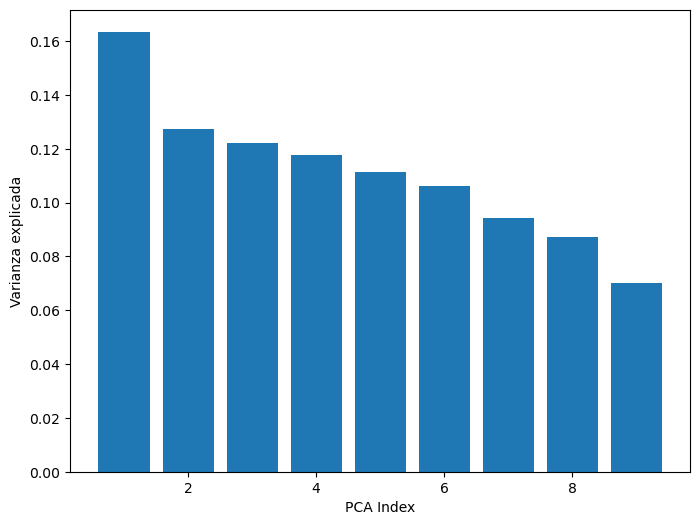

In [98]:
plt.figure(figsize=(8,6))
plt.bar(range(1, 10), pca.explained_variance_ratio_)
plt.ylabel('Varianza explicada')
plt.xlabel('PCA Index')
plt.show()

In [99]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

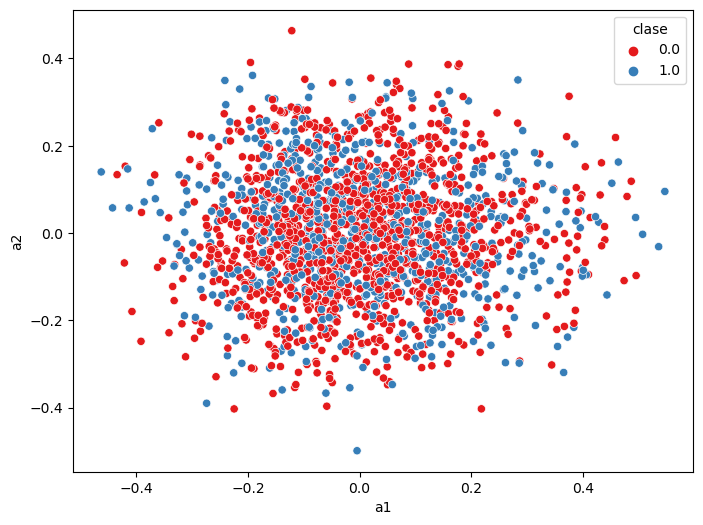

In [100]:
df1 = pd.DataFrame()
df1["a1"]= X_train_pca[:,0]
df1["a2"] = X_train_pca[:,1]
df1["clase"]=y_train
plt.figure(figsize=(8,6))
sns.scatterplot(x=df1["a1"],y=df1["a2"], hue = df1["clase"], palette="Set1")
plt.show()

In [109]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train)
kmeans.labels_

array([0, 0, 0, ..., 0, 1, 0])

In [110]:
kmeans.inertia_

293.3925407097012

In [113]:
df1 = pd.DataFrame()
df1["atributo1"]= X_train[:,0]
df1["atributo2"] = X_train[:,3]

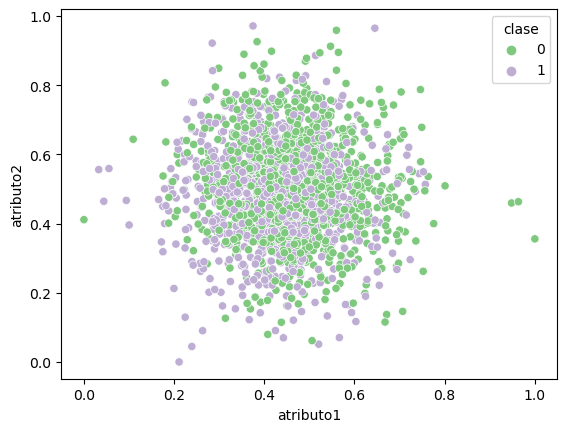

In [114]:
df1["clase"]=kmeans.labels_
sns.scatterplot(x=df1["atributo1"],y=df1["atributo2"],hue = df1["clase"], palette="Accent")
plt.show()

In [122]:
clasificador = KNeighborsClassifier(5)
clasificador.fit(X_train, y_train)
yhat = clasificador.predict(X_test)
yhat

c:\Anaconda3\envs\formacionctag\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 0., 0., 0.

In [124]:
accuracy_score(y_test, yhat)

0.6116959064327485

In [125]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='macro')

0.5683289131122412

In [126]:
metricas = dict()
list_accuracy = []
for i in range(1,15):
    #print(i)
    clasificador = KNeighborsClassifier(i, algorithm="brute")
    clasificador.fit(X_train, y_train)
    yhat = clasificador.predict(X_test)
    resultado = accuracy_score(y_test, yhat)
    metricas[i] = resultado
    list_accuracy.append(resultado)
print (list_accuracy)
print(metricas)

c:\Anaconda3\envs\formacionctag\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Anaconda3\envs\formacionctag\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Anaconda3\envs\formacionctag\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Anaconda3\envs\formacionctag\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

[0.5812865497076023, 0.6140350877192983, 0.6046783625730994, 0.6152046783625731, 0.6116959064327485, 0.6362573099415205, 0.6269005847953216, 0.6362573099415205, 0.6222222222222222, 0.6280701754385964, 0.6292397660818714, 0.6257309941520468, 0.6152046783625731, 0.6187134502923977]
{1: 0.5812865497076023, 2: 0.6140350877192983, 3: 0.6046783625730994, 4: 0.6152046783625731, 5: 0.6116959064327485, 6: 0.6362573099415205, 7: 0.6269005847953216, 8: 0.6362573099415205, 9: 0.6222222222222222, 10: 0.6280701754385964, 11: 0.6292397660818714, 12: 0.6257309941520468, 13: 0.6152046783625731, 14: 0.6187134502923977}


c:\Anaconda3\envs\formacionctag\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Anaconda3\envs\formacionctag\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Anaconda3\envs\formacionctag\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [127]:
np.argmax(list_accuracy)

5

In [147]:
confusion_matrix(y_test, yhat, normalize=True)

InvalidParameterError: The 'normalize' parameter of confusion_matrix must be a str among {'all', 'true', 'pred'} or None. Got True instead.

In [137]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clf1_vot = LogisticRegression(solver = "liblinear", multi_class ="auto")
clf2_vot = RandomForestClassifier(n_estimators=100)
clf3_vot = GaussianNB()
 
clf_vot = VotingClassifier(estimators=[('lr', clf1_vot), ('rf', clf2_vot), ('gnb', clf3_vot)],
                           voting='soft', #para tener las probabilidades, 'hard' para tener solo la clase
                           weights=[1,1,1])
clf_vot.fit(X_train, y_train)

c:\Anaconda3\envs\formacionctag\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Anaconda3\envs\formacionctag\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
c:\Anaconda3\envs\formacionctag\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='auto',
                                                 solver='liblinear')),
                             ('rf', RandomForestClassifier()),
                             ('gnb', GaussianNB())],
                 voting='soft', weights=[1, 1, 1])

In [138]:
yhat_vot = clf_vot.predict(X_test)

In [139]:
print("Accuracy: ", accuracy_score(y_test,yhat_vot))

Accuracy:  0.6257309941520468
